Hierarchical Clustering on Cars Dataset

1-Importing The Libraries And Reading The Dataset

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering
import pylab
%matplotlib inline

In [18]:
df=pd.read_csv(r'C:\Users\user\Downloads\cars_clus.csv')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


2-Data Cleaning And Exploration

In [19]:
#some columns rows have NaNs so we start removing them
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [20]:
#turning NaNs to 0
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
#removing the rows 
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


3-Getting Started With Featureset Settings

In [21]:
#choosing the features we want to work with
featureset=df[['engine_s','horsepow','width','length','fuel_cap','mpg']]
min_max=MinMaxScaler()
x=featureset.values
feature_matrix=min_max.fit_transform(x)
feature_matrix

array([[0.11428571, 0.21518987, 0.28143713, 0.30625832, 0.13364055,
        0.43333333],
       [0.31428571, 0.43037975, 0.46107784, 0.5792277 , 0.31797235,
        0.33333333],
       [0.35714286, 0.39240506, 0.52694611, 0.62849534, 0.35483871,
        0.23333333],
       [0.11428571, 0.24050633, 0.33532934, 0.38082557, 0.28110599,
        0.4       ],
       [0.25714286, 0.36708861, 0.80838323, 0.56724368, 0.37788018,
        0.23333333],
       [0.45714286, 0.64556962, 0.68263473, 0.64980027, 0.61751152,
        0.2       ],
       [0.25714286, 0.34936709, 0.35329341, 0.35419441, 0.29032258,
        0.3       ],
       [0.25714286, 0.34936709, 0.49700599, 0.51398136, 0.37788018,
        0.32666667],
       [0.3       , 0.30379747, 0.60479042, 0.60186418, 0.33179724,
        0.33333333],
       [0.4       , 0.46835443, 0.60479042, 0.62316911, 0.33179724,
        0.26666667],
       [0.4       , 0.37974684, 0.7245509 , 0.76431425, 0.37788018,
        0.3       ],
       [0.4       , 0

4-Creating The Matrix And Hierarchical Tree

In [22]:
dist_matrix=euclidean_distances(feature_matrix,feature_matrix)
dist_matrix

array([[0.        , 0.48689625, 0.58602457, ..., 0.23007097, 0.19136392,
        0.17803683],
       [0.48689625, 0.        , 0.14630061, ..., 0.32741937, 0.60647595,
        0.5404592 ],
       [0.58602457, 0.14630061, 0.        , ..., 0.41608439, 0.68728413,
        0.61413197],
       ...,
       [0.23007097, 0.32741937, 0.41608439, ..., 0.        , 0.36941548,
        0.30579706],
       [0.19136392, 0.60647595, 0.68728413, ..., 0.36941548, 0.        ,
        0.11131274],
       [0.17803683, 0.5404592 , 0.61413197, ..., 0.30579706, 0.11131274,
        0.        ]])

In [23]:
The_tree = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\user\AppData\Local\Temp\ipykernel_16200\2814627554.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  The_tree = hierarchy.linkage(dist_matrix, 'complete')


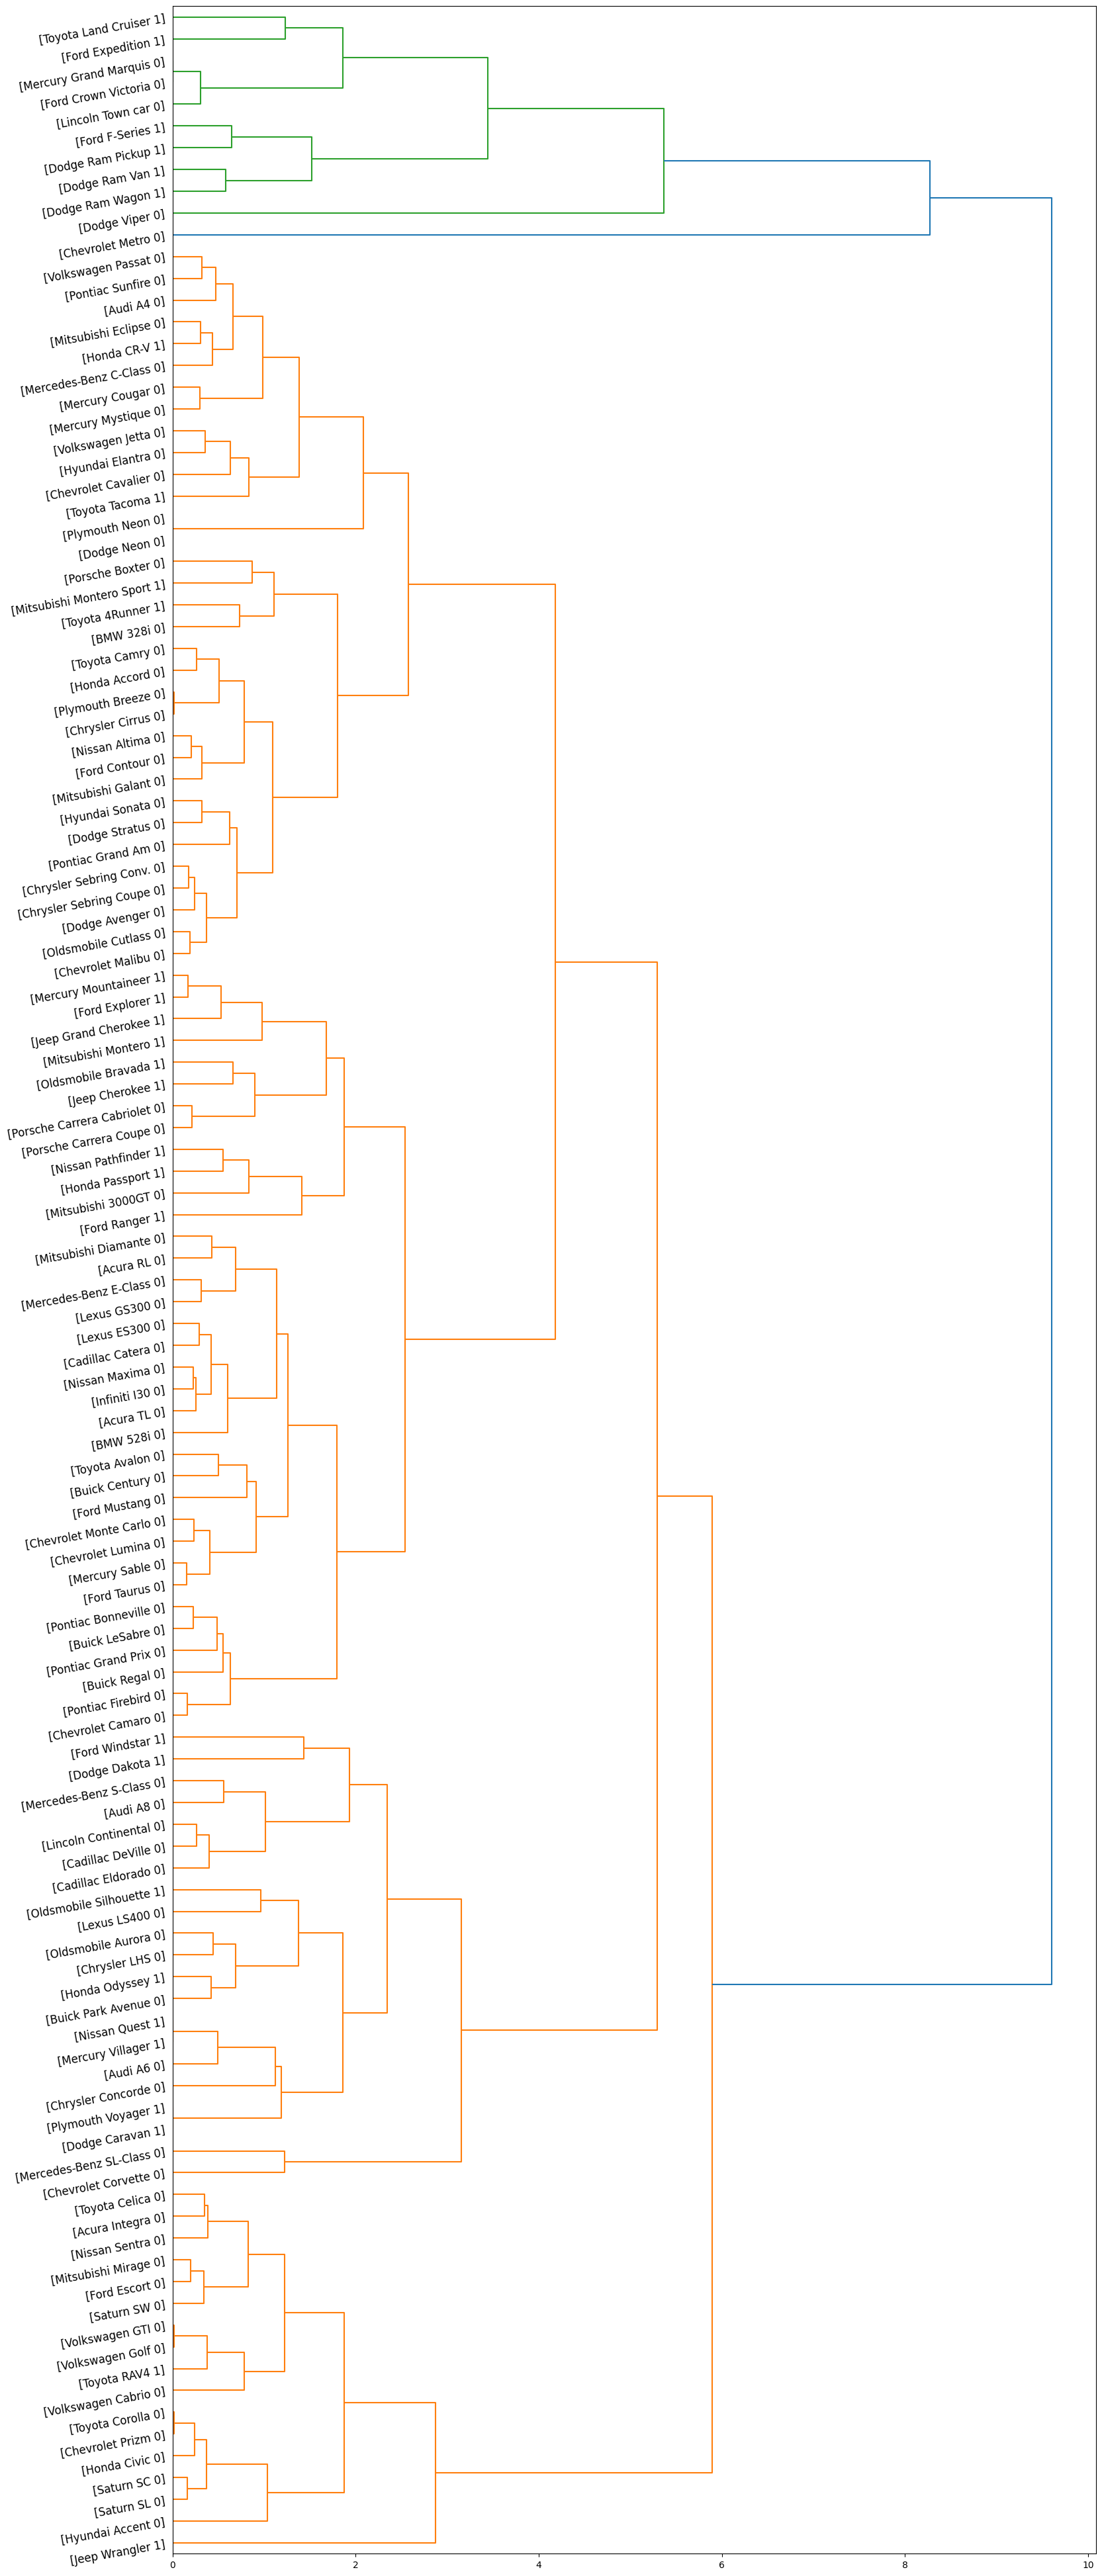

In [24]:
fig = pylab.figure(figsize=(18,50))
#defining the leaf label function
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
#visualizing the tree
dendro = hierarchy.dendrogram(The_tree,  leaf_label_func=llf, leaf_rotation=10, leaf_font_size =12, orientation = 'right')

In [25]:
#more visualization using agglomerative clustering 
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:541: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 3,
       5, 0, 0, 2, 0, 2, 0, 0, 0, 4, 1, 1, 1, 2, 2, 3, 0, 0, 0, 1, 0, 2,
       1, 0, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 1, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3,
       0, 1, 3, 0, 0, 3, 3], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

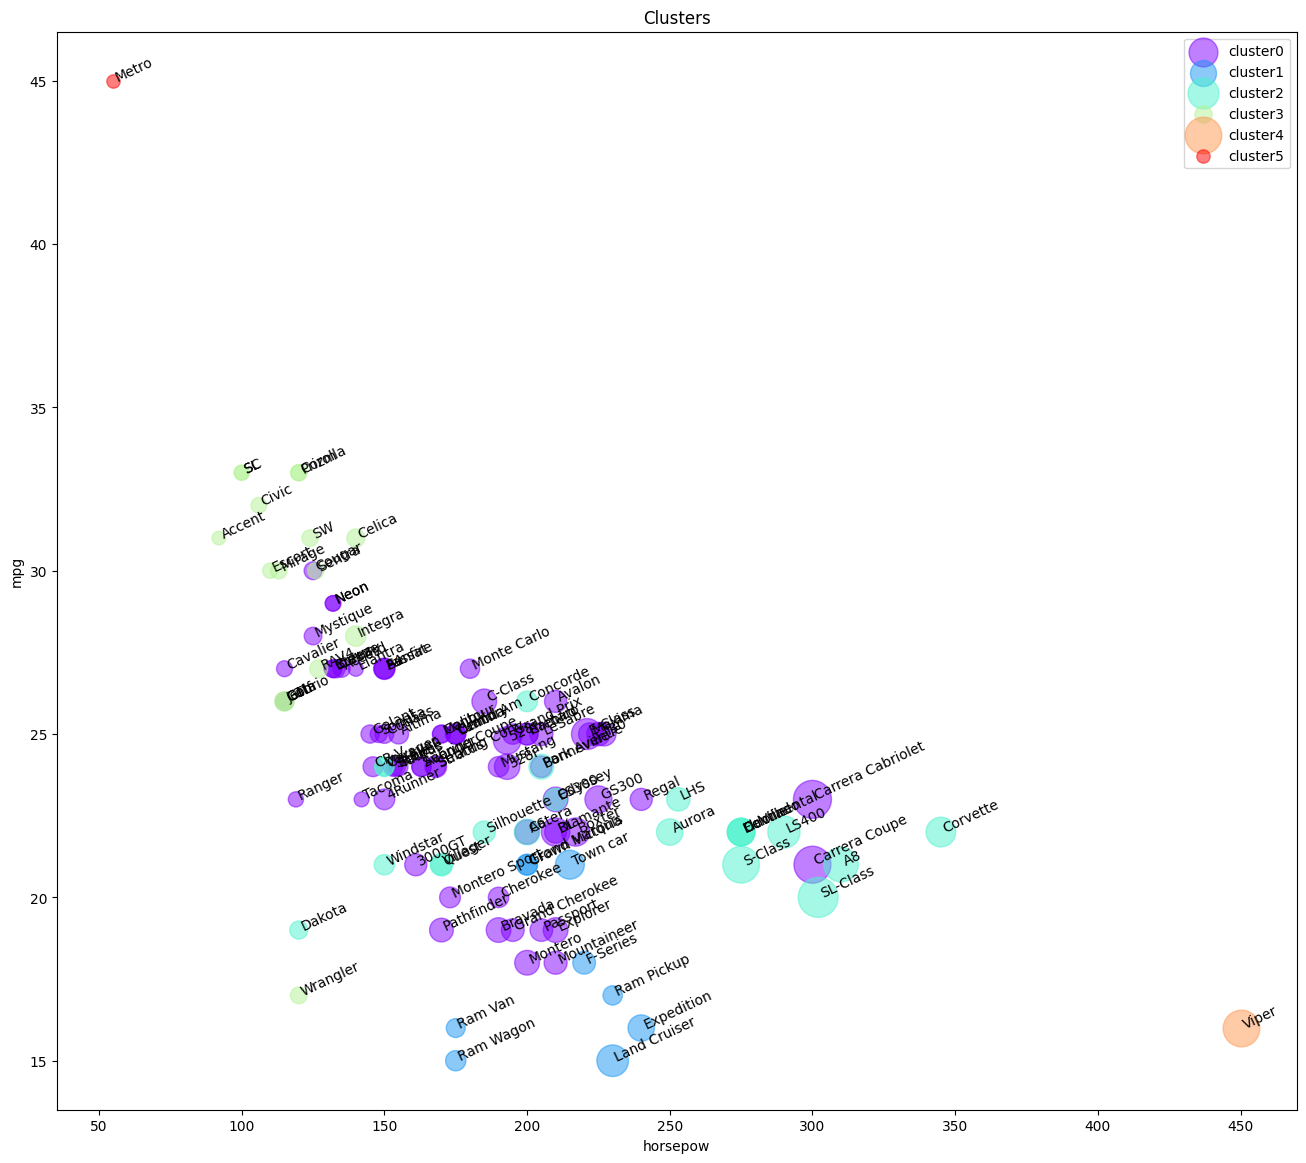

In [26]:
df['cluster_'] = agglom.labels_
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [27]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     55
          1.0     13
1         0.0      3
          1.0      6
2         0.0     13
          1.0      8
3         0.0     15
          1.0      2
4         0.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [28]:
df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_16200\3855831715.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   177.763636  2.807273  25.014545  24.903109
         1.0   176.923077  3.300000  20.307692  24.327077
1        0.0   205.000000  4.600000  21.000000  29.376667
         1.0   211.666667  4.483333  16.166667  29.024667
2        0.0   265.769231  4.138462  22.230769  45.029154
         1.0   163.125000  2.975000  21.875000  22.132375
3        0.0   115.733333  1.840000  30.200000  14.498867
         1.0   123.500000  2.250000  22.000000  15.674000
4        0.0   450.000000  8.000000  16.000000  69.725000
5        0.0    55.000000  1.000000  45.000000   9.235000